In [1]:
pip install -Uq pymorphy2 nltk wordcloud matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk
from nltk.corpus import stopwords
import pymorphy2
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

regexp = nltk.tokenize.RegexpTokenizer("\w+")
# treebank = nltk.tokenize.TreebankWordTokenizer()
# whitespace = nltk.tokenize.WhitespaceTokenizer()
morph = pymorphy2.MorphAnalyzer()

In [10]:
files = {
    "./Texts/chudesniy_doktor.txt": "Чудесный Доктор",              # 1897
    "./Texts/nochnaya_smena.txt": "Ночная Смена",                   # 1899
    "./Texts/beliy_pudel.txt": "Белый Пудель",                      # 1903
    "./Texts/poedinok.txt": "Поединок",                             # 1905
    "./Texts/izumrud.txt": "Изумруд",                               # 1907
    "./Texts/granatovy_braslet.txt": "Гранатовый Браслет",          # 1910
    "./Texts/anaphema.txt": "Анафема",                              # 1913
    "./Texts/zvezda_solomona.txt": "Звезда Соломона",               # 1917
    "./Texts/limonnaya_korka.txt": "Лимонная Корка",                # 1920
    "./Texts/sinaya_zvezda.txt": "Синяя Звезда",                    # 1927 
    }
kuprin = {}
# noise = ["ничего", "нечего", "тому", "той", "тем", "своей", "своих", "своего", "своей", "не", "он", "его", "него", "нему", "ему", "она", "неё", "нее", "её", "ее", "ней", "ей", "они", "их", "им", "ним", "из", "только", "этой", "ты", "ни", "а", "и", "в", "то", "от", "с", "все", "что", "же", "был", "было", "была", "как", "к", "когда", "за", "но", "на", "да", "нет", "у", "уже", "так", "чтобы", "по", "о", "я", "ну", "вот", "того", "кто", "вы", "это", "есть", "еще", "до", "во", "назад", "тебе", "вам", "вас", "мне", "меня", "до", "для", "если", "или", "со", "под"]
noise = stopwords.words("russian")

for filename, name in files.items():
    with open(filename, "r") as file:
        # kuprin.update({name: [word.lower() if word.lower() not in noise else "" for word in regexp.tokenize(file.read())]})
        kuprin.update({name: [word.lower() for word in regexp.tokenize(file.read())]})


In [12]:
print(len(kuprin["Белый Пудель"]), len([word for word in kuprin["Белый Пудель"] if word not in noise]), f"Очистили на {len([word for word in kuprin['Белый Пудель'] if word not in noise])/len(kuprin['Белый Пудель'])%.2f%}", sep="\n\n")

SyntaxError: invalid decimal literal (1639744267.py, line 1)

In [4]:
kuprin["Чудесный Доктор"][100:400]

['',
 '',
 'стороны',
 'лишь',
 'изменил',
 'имена',
 'некоторых',
 'действующих',
 'лиц',
 '',
 'трогательной',
 'истории',
 '',
 'придал',
 'устному',
 'рассказу',
 'письменную',
 'форму',
 'гриш',
 '',
 'гриш',
 'гляди',
 'ка',
 'поросенок',
 '',
 'смеется',
 '',
 '',
 '',
 '',
 'рту',
 '',
 '',
 '',
 'смотри',
 'смотри',
 'травка',
 '',
 'рту',
 '',
 'богу',
 'травка',
 '',
 'штука',
 '',
 '',
 'двое',
 'мальчуганов',
 'стоящих',
 'перед',
 'огромным',
 '',
 'цельного',
 'стекла',
 'окном',
 'гастрономического',
 'магазина',
 'принялись',
 'неудержимо',
 'хохотать',
 'толкая',
 'друг',
 'друга',
 '',
 'бок',
 'локтями',
 '',
 'невольно',
 'приплясывая',
 '',
 'жестокой',
 'стужи',
 '',
 '',
 'более',
 'пяти',
 'минут',
 'торчали',
 'перед',
 '',
 'великолепной',
 'выставкой',
 'возбуждавшей',
 '',
 'одинаковой',
 'степени',
 '',
 'умы',
 '',
 'желудки',
 'здесь',
 'освещенные',
 'ярким',
 'светом',
 'висящих',
 'ламп',
 'возвышались',
 'целые',
 'горы',
 'красных',
 'крепких',
 'яб

Чудесный Доктор


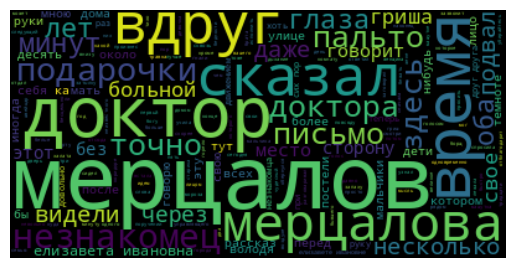

Ночная Смена


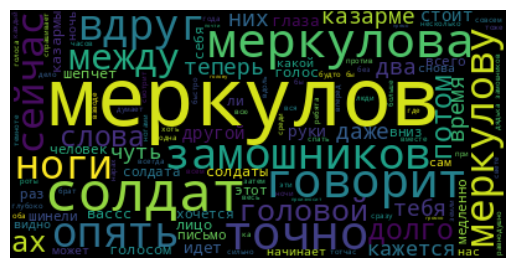

Белый Пудель


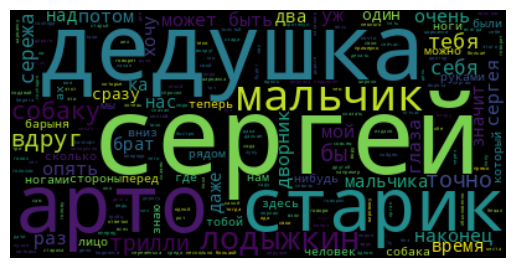

Поединок


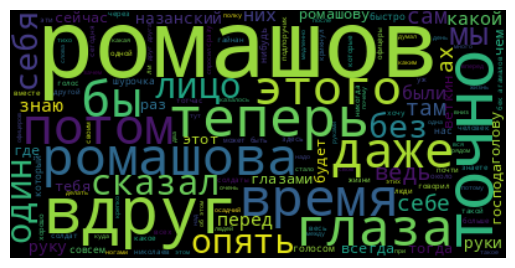

Изумруд


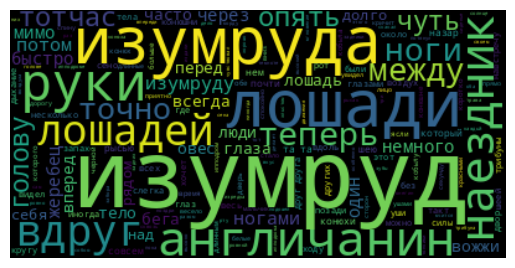

Гранатовый Браслет


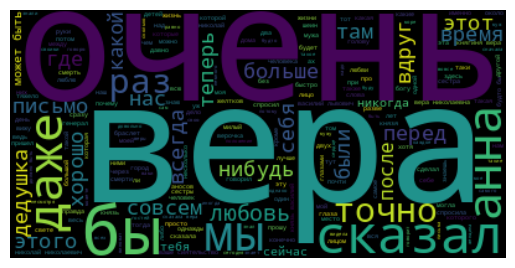

Анафема


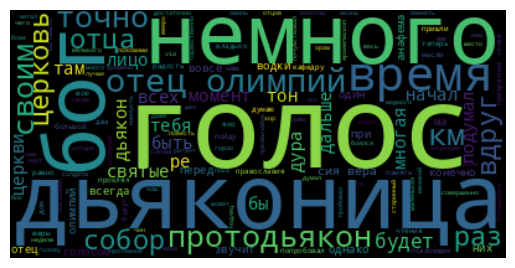

Звезда Соломона


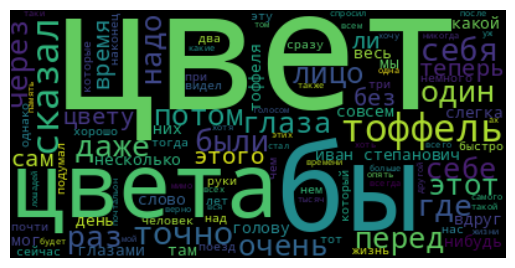

Лимонная Корка


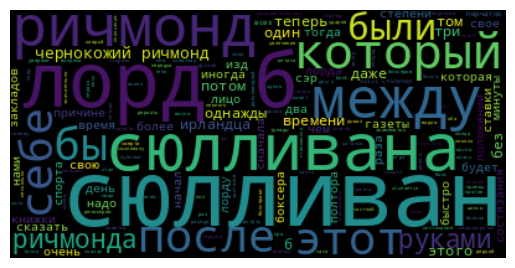

Синяя Звезда


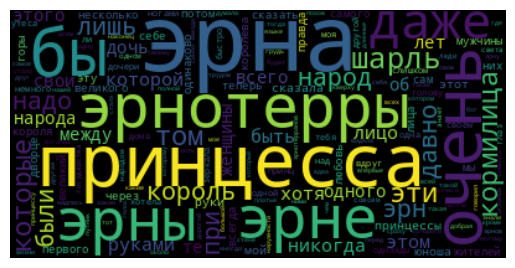

In [5]:
for name, tokenized in kuprin.items():
    print(name)
    wordcloud_doc = WordCloud().generate(" ".join(tokenized))

    plt.imshow(wordcloud_doc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [7]:
for name in kuprin.keys():
    kuprin[name] = dict(zip([morph.parse(word)[0].word for word in kuprin[name]], [morph.parse(word)[0].tag.POS for word in kuprin[name]]))

In [ ]:
kuprin["Поединок"]